# **Task** #2 prediction using **Unsupervised** **Machine** **Learning** 


**Unsupervised** **Machine** **Learning** 
             is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. 
              Two of the main methods used in unsupervised learning are principal component and cluster analysis.


  **Task** **assigned** : 
  To predict the optimum number of clusters that can be obtained from the given 'Iris' data set and visualize the same .

 **Approach**: Here we make use of **K**-**Means** **Clustering** algorithm to obtain the cluster of the given data set.

**Importing** **libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
import seaborn as sns


**Loading the** **data** **set** 


In [27]:
Iris=datasets.load_iris()
Iris_data=pd.DataFrame(Iris.data,columns=Iris.feature_names)
Iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**Extracting** **information** **from** **the** **loaded**  **data** 

In [9]:
Iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking** **for** **null** **values** 

In [10]:
Iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Inspecting** **the** **datatypes**

In [29]:
print(Iris_data.groupby('sepal length (cm)').size())


sepal length (cm)
4.3     1
4.4     3
4.5     1
4.6     4
4.7     2
4.8     5
4.9     6
5.0    10
5.1     9
5.2     4
5.3     1
5.4     6
5.5     7
5.6     6
5.7     8
5.8     7
5.9     3
6.0     6
6.1     6
6.2     4
6.3     9
6.4     7
6.5     5
6.6     2
6.7     8
6.8     3
6.9     4
7.0     1
7.1     1
7.2     3
7.3     1
7.4     1
7.6     1
7.7     4
7.9     1
dtype: int64


**Plotting** **the** **data**

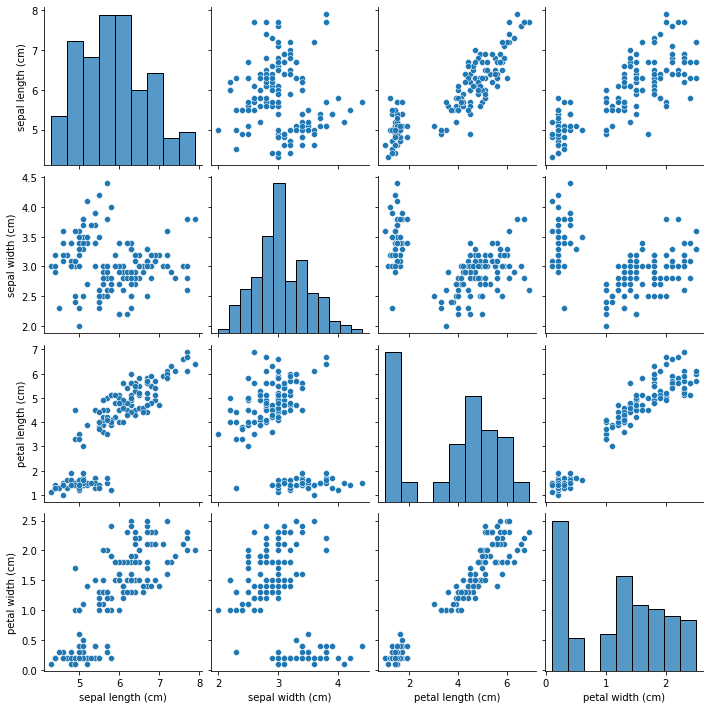

In [40]:
sns.pairplot(Iris_data)


**Analysing** **the** **feasible** **clusters**

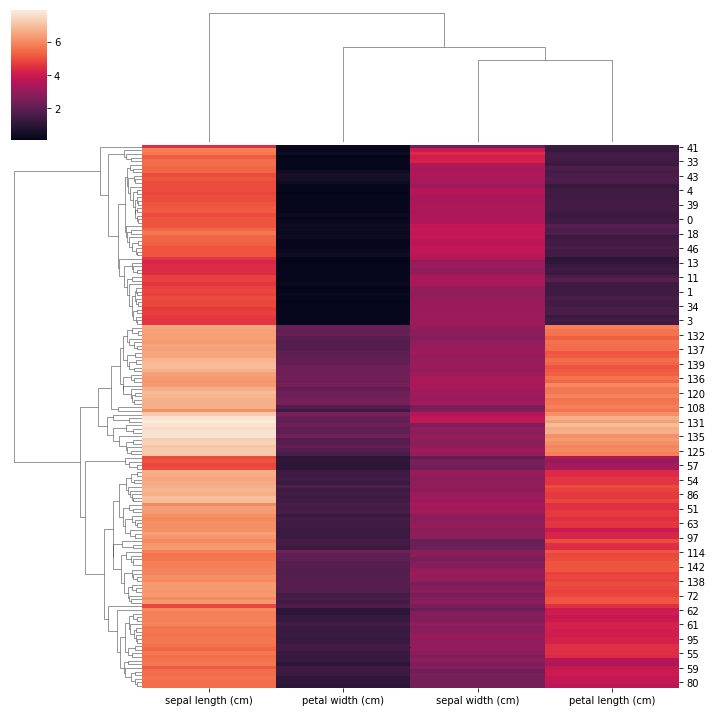

In [42]:
sns.clustermap(Iris_data)

**Seperating** **the** **features** **from** **the** **dataset**

In [44]:
features=Iris_data.iloc[:,[0,1,2,3]].values
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Implementing** **Elbow** **method** **to** **obtain** **the** **possible** **number** **of** **clusters**  

Text(0.5, 1.0, 'Cluster analysis')

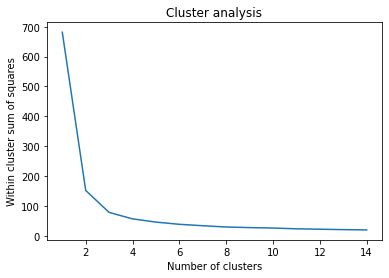

In [51]:
from sklearn.cluster import KMeans 
clusters=[]
for a in range (1,15): 
  kmeans =KMeans(n_clusters=a,init='k-means++',random_state=0)
  kmeans.fit(features)
  clusters.append(kmeans.inertia_)
plt.plot(range(1,15),clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squares")
plt.title("Cluster analysis")

**Applying** **KMeans cluster algorithm to the data set**

In [53]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(features)

**Cluster** **visualization**

Text(0.5, 1.0, 'Cluster plot of iris dataset')

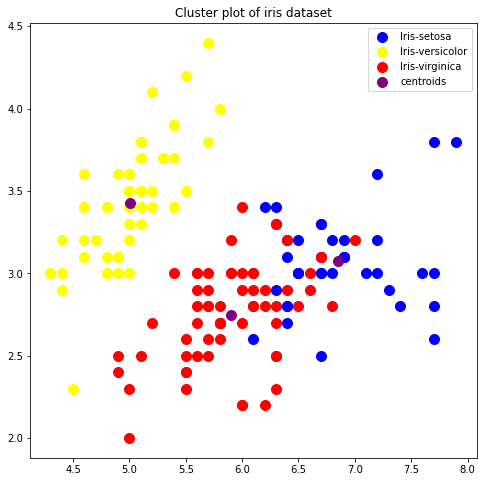

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(features[y_kmeans==0,0],features[y_kmeans==0,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(features[y_kmeans==1,0],features[y_kmeans==1,1],s=100,c='yellow',label='Iris-versicolor')
plt.scatter(features[y_kmeans==2,0],features[y_kmeans==2,1],s=100,c='red',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='purple',label='centroids')
plt.legend()
plt.title("Cluster plot of iris dataset")


**Conclusion**:
   
   From the above plot it is evident  that ***three*** major clusters can be obtained from the given data set of iris.